## Statistics Calculation

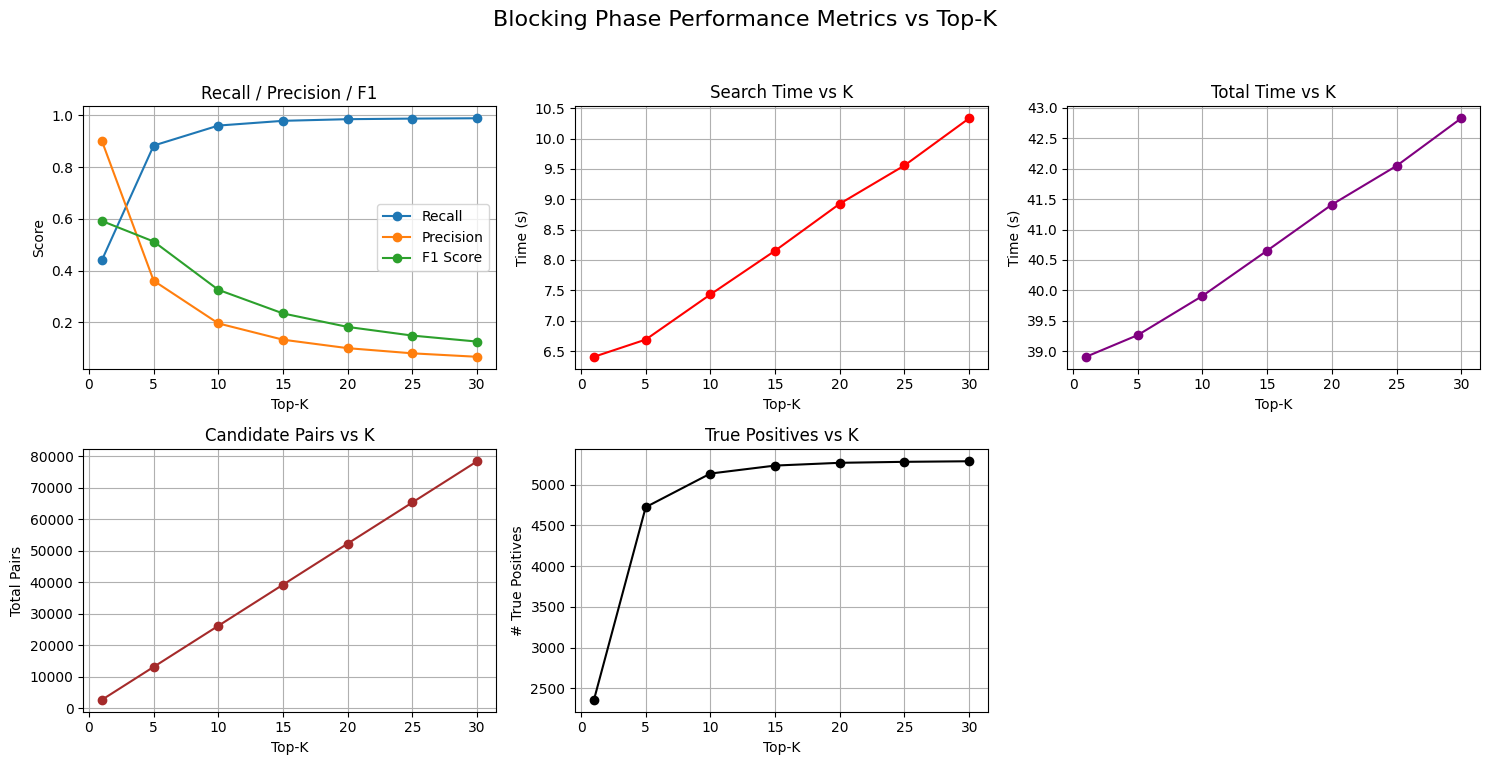

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("dblp_scholar_evaluation_results_DBLP-Scholar.csv")

# Compute total time
df["total_time"] = df["embedding_time"] + df["build_time"] + df["search_time"]

# Set up a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Blocking Phase Performance Metrics vs Top-K", fontsize=16)

# Plot Recall, Precision, F1 in one subplot
axs[0, 0].plot(df["k"], df["recall"], marker='o', label="Recall")
axs[0, 0].plot(df["k"], df["precision"], marker='o', label="Precision")
axs[0, 0].plot(df["k"], df["f1_score"], marker='o', label="F1 Score")
axs[0, 0].set_title("Recall / Precision / F1")
axs[0, 0].set_xlabel("Top-K")
axs[0, 0].set_ylabel("Score")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Search Time
axs[0, 1].plot(df["k"], df["search_time"], marker='o', color='red')
axs[0, 1].set_title("Search Time vs K")
axs[0, 1].set_xlabel("Top-K")
axs[0, 1].set_ylabel("Time (s)")
axs[0, 1].grid(True)

# Plot Total Time
axs[0, 2].plot(df["k"], df["total_time"], marker='o', color='purple')
axs[0, 2].set_title("Total Time vs K")
axs[0, 2].set_xlabel("Top-K")
axs[0, 2].set_ylabel("Time (s)")
axs[0, 2].grid(True)

# Plot Total Candidate Pairs
axs[1, 0].plot(df["k"], df["total_pairs"], marker='o', color='brown')
axs[1, 0].set_title("Candidate Pairs vs K")
axs[1, 0].set_xlabel("Top-K")
axs[1, 0].set_ylabel("Total Pairs")
axs[1, 0].grid(True)

# Plot True Positives
axs[1, 1].plot(df["k"], df["true_positives"], marker='o', color='black')
axs[1, 1].set_title("True Positives vs K")
axs[1, 1].set_xlabel("Top-K")
axs[1, 1].set_ylabel("# True Positives")
axs[1, 1].grid(True)

# Hide the last empty subplot
axs[1, 2].axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
import pandas as pd
import os


ground_truth_path = os.path.join("files", "labeled_data.csv")

# Load ground-truth matches 
ground_truth_df = pd.read_csv(ground_truth_path, skiprows=5)  

# Only keep positive matches (gold == 1)
ground_truth_matches = set(zip(
    ground_truth_df.loc[ground_truth_df['gold'] == 1, 'ltable.ID'],
    ground_truth_df.loc[ground_truth_df['gold'] == 1, 'rtable.ID']
))

print(f"Total ground-truth matches: {len(ground_truth_matches)}")

# === Load my candidate set
candidate_df = pd.read_csv('entity_matches.csv')  

# Build candidate set
candidate_set = set(zip(candidate_df['left_id'], candidate_df['right_id']))

print(f"Total candidate pairs generated: {len(candidate_set)}")

# === Compute metrics ===

# True positives = intersection between candidate set and ground truth matches
true_positives = ground_truth_matches.intersection(candidate_set)

# Recall = (# of true matches found) / (total true matches)
recall = len(true_positives) / len(ground_truth_matches) if len(ground_truth_matches) > 0 else 0.0

# Precision = (# of true matches found) / (# of candidate pairs)
precision = len(true_positives) / len(candidate_set) if len(candidate_set) > 0 else 0.0

# Reduction Ratio (RR) = 1 - (# candidate pairs / total possible pairs)
# Total possible pairs = len(ltable) * len(rtable)
# You need to know how many total items were in original tables
n_ltable = ground_truth_df['ltable.ID'].nunique()
n_rtable = ground_truth_df['rtable.ID'].nunique()
total_possible_pairs = n_ltable * n_rtable

reduction_ratio = 1 - (len(candidate_set) / total_possible_pairs)

# === Print results ===
print(f"\n🔎 Evaluation Metrics:")
print(f"Blocking Recall: {recall:.4f}")
print(f"Blocking Precision: {precision:.4f}")
print(f"Reduction Ratio: {reduction_ratio:.4f}")

Total ground-truth matches: 58
Total candidate pairs generated: 127770

🔎 Evaluation Metrics:
Blocking Recall: 0.7759
Blocking Precision: 0.0004
Reduction Ratio: -0.0315


In [5]:
import pandas as pd

# Load your matching results
matches_df = pd.read_csv("entity_matches.csv")  # if not already in memory

# Load ground truth
ground_truth = pd.read_csv("Abt-Buy/abt_buy_perfectMapping.csv")

# Convert to sets of tuples for fast lookup
predicted_set = set(zip(matches_df['left_id'], matches_df['right_id']))
ground_truth_set = set(zip(ground_truth['idAbt'], ground_truth['idBuy']))

# Compute true positives
true_positives = predicted_set & ground_truth_set

# Compute recall
recall = len(true_positives) / len(ground_truth_set)

# Compute precision (Pairs Quality)
precision = len(true_positives) / len(predicted_set)

# Compute F1 Score
if (precision + recall) > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

print(f"Recall: {recall:.4f} ({len(true_positives)} / {len(ground_truth_set)})")
print(f"Precision (Pairs Quality): {precision:.4f} ({len(true_positives)} / {len(predicted_set)})")
print(f"F1 Score: {f1_score:.4f}")

Recall: 0.9745 (1069 / 1097)
Precision (Pairs Quality): 0.0659 (1069 / 16215)
F1 Score: 0.1235


In [1]:
import pandas as pd

# Load your matching results
matches_df = pd.read_csv("entity_matches.csv")  # if not already in memory

# Load ground truth
ground_truth = pd.read_csv("DBLP-Scholar/DBLP-Scholar_perfectMapping.csv")

print(ground_truth.columns)

# Convert to sets of tuples for fast lookup
predicted_set = set(zip(matches_df['left_id'], matches_df['right_id']))
ground_truth_set = set(zip(ground_truth['idDBLP'], ground_truth['idScholar']))

# Compute true positives
true_positives = predicted_set & ground_truth_set

# Compute recall
recall = len(true_positives) / len(ground_truth_set)

print(f"Recall: {recall:.4f} ({len(true_positives)} / {len(ground_truth_set)})")

Index(['idDBLP', 'idScholar'], dtype='object')
Recall: 0.9609 (5138 / 5347)


In [ ]:
import pandas as pd

# Load your matching results
matches_df = pd.read_csv("entity_matches.csv")  # if not already in memory

# Load ground truth
ground_truth = pd.read_csv("DBLP-Scholar/DBLP-Scholar_perfectMapping.csv")

print(ground_truth.columns)

# Convert to sets of tuples for fast lookup
predicted_set = set(zip(matches_df['left_id'], matches_df['right_id']))
ground_truth_set = set(zip(ground_truth['idDBLP'], ground_truth['idScholar']))

# Compute true positives
true_positives = predicted_set & ground_truth_set

# Compute recall
recall = len(true_positives) / len(ground_truth_set)

print(f"Recall: {recall:.4f} ({len(true_positives)} / {len(ground_truth_set)})")

In [2]:

import pandas as pd

# Load your matching results
matches_df = pd.read_csv("entity_matches.csv")  # if not already in memory

# Load ground truth
ground_truth = pd.read_csv("walmart_amazon/matches.csv")

print(ground_truth.columns)

# Convert to sets of tuples for fast lookup
predicted_set = set(zip(matches_df['left_id'], matches_df['right_id']))
ground_truth_set = set(zip(ground_truth['id1'], ground_truth['id2']))

# Compute true positives
true_positives = predicted_set & ground_truth_set

# Compute recall
recall = len(true_positives) / len(ground_truth_set)

print(f"Recall: {recall:.4f} ({len(true_positives)} / {len(ground_truth_set)})")

Index(['id1', 'id2'], dtype='object')
Recall: 0.8951 (1033 / 1154)



=== Classification Metrics ===
Recall (Pair Completeness): 0.8951
Precision (Pairs Quality): 0.0404
F1 Score: 0.0774

=== Blocking Efficiency ===
Candidate pairs: 25540
Reduction Ratio: 0.9990948587979724
Pairs Quality: 0.0404

=== Block Statistics ===
Mean block size: 3.76
Median block size: 2.00
Max block size: 134
Min block size: 1


KeyError: 'block_sizes'

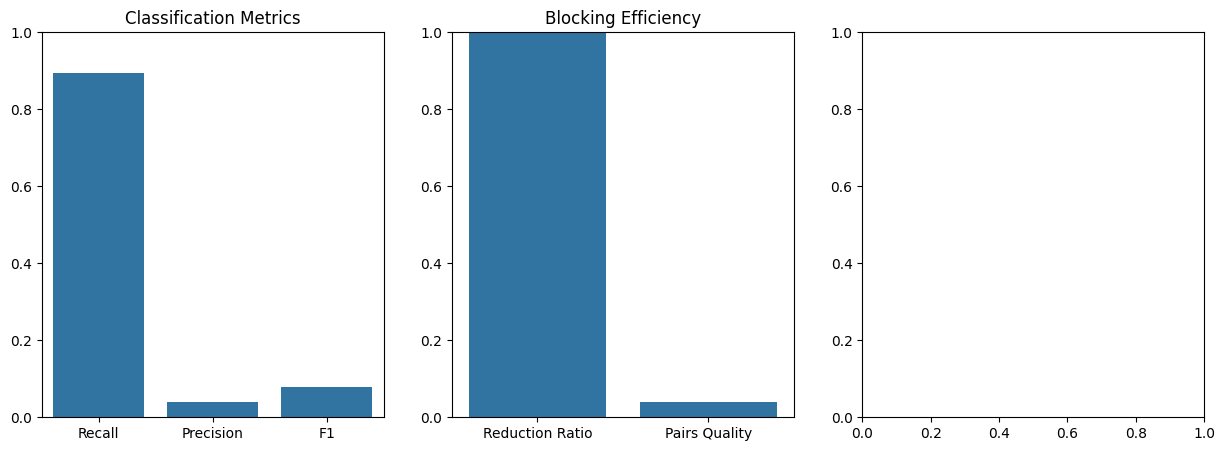

In [7]:
import pandas as pd
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_blocking(matches_df, ground_truth_path, blocking_stats=None):
    """
    Comprehensive evaluation of blocking performance
    
    Args:
        matches_df: DataFrame with candidate pairs from blocking
        ground_truth_path: path to ground truth matches file
        blocking_stats: dict with blocking statistics (optional)
    
    Returns:
        dict with all computed metrics
    """
    # Load ground truth
    ground_truth = pd.read_csv(ground_truth_path)
    
    # Convert to sets of tuples for fast lookup
    predicted_set = set(zip(matches_df['left_id'], matches_df['right_id']))
    ground_truth_set = set(zip(ground_truth['id1'], ground_truth['id2']))
    
    # Basic counts
    num_predicted = len(predicted_set)
    num_ground_truth = len(ground_truth_set)
    
    # Compute true positives, false positives, false negatives
    true_positives = predicted_set & ground_truth_set
    false_positives = predicted_set - ground_truth_set
    false_negatives = ground_truth_set - predicted_set
    
    # Standard classification metrics
    recall = len(true_positives) / num_ground_truth if num_ground_truth > 0 else 0
    precision = len(true_positives) / num_predicted if num_predicted > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Blocking-specific metrics
    metrics = {
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'true_positives': len(true_positives),
        'false_positives': len(false_positives),
        'false_negatives': len(false_negatives),
        'candidate_pairs': num_predicted,
        'ground_truth_pairs': num_ground_truth
    }
    
    # Calculate reduction ratio if we have total entity counts
    if blocking_stats:
        total_entities_left = blocking_stats.get('total_entities_left')
        total_entities_right = blocking_stats.get('total_entities_right')
        
        if total_entities_left and total_entities_right:
            total_possible_pairs = total_entities_left * total_entities_right
            reduction_ratio = 1 - (num_predicted / total_possible_pairs)
            metrics['reduction_ratio'] = reduction_ratio
            metrics['total_possible_pairs'] = total_possible_pairs
    
    # Calculate pairs quality
    metrics['pairs_quality'] = len(true_positives) / num_predicted if num_predicted > 0 else 0
    
    # Calculate pair completeness (same as recall for blocking)
    metrics['pair_completeness'] = recall
    
    return metrics

def analyze_block_sizes(matches_df):
    """
    Analyze distribution of block sizes
    
    Args:
        matches_df: DataFrame with candidate pairs
        
    Returns:
        dict with block size statistics
    """
    # Count how many pairs each entity appears in
    left_counts = matches_df['left_id'].value_counts()
    right_counts = matches_df['right_id'].value_counts()
    
    # Combine counts (approximation of block sizes)
    all_counts = pd.concat([left_counts, right_counts])
    
    return {
        'mean_block_size': all_counts.mean(),
        'median_block_size': all_counts.median(),
        'max_block_size': all_counts.max(),
        'min_block_size': all_counts.min(),
        'block_size_std': all_counts.std(),
        'total_blocks': len(all_counts)
    }

def plot_metrics(metrics, blocking_stats=None):
    """
    Visualize key metrics
    
    Args:
        metrics: dict from evaluate_blocking
        blocking_stats: dict from analyze_block_sizes
    """
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Classification metrics
    plt.subplot(1, 3, 1)
    sns.barplot(x=['Recall', 'Precision', 'F1'], 
                y=[metrics['recall'], metrics['precision'], metrics['f1_score']])
    plt.title('Classification Metrics')
    plt.ylim(0, 1)
    
    # Plot 2: Blocking efficiency
    plt.subplot(1, 3, 2)
    if 'reduction_ratio' in metrics:
        sns.barplot(x=['Reduction Ratio', 'Pairs Quality'], 
                    y=[metrics['reduction_ratio'], metrics['pairs_quality']])
        plt.title('Blocking Efficiency')
        plt.ylim(0, 1)
    
    # Plot 3: Block size distribution
    if blocking_stats:
        plt.subplot(1, 3, 3)
        sns.histplot(blocking_stats['block_sizes'], bins=30, kde=True)
        plt.title('Block Size Distribution')
        plt.xlabel('Block Size')
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load your matching results
    matches_df = pd.read_csv("entity_matches.csv")
    
    # Calculate metrics
    blocking_stats = {
        'total_entities_left': matches_df['left_id'].nunique(),
        'total_entities_right': matches_df['right_id'].nunique()
    }
    
    metrics = evaluate_blocking(matches_df, "walmart_amazon/matches.csv", blocking_stats)
    block_stats = analyze_block_sizes(matches_df)
    
    # Print results
    print("\n=== Classification Metrics ===")
    print(f"Recall (Pair Completeness): {metrics['recall']:.4f}")
    print(f"Precision (Pairs Quality): {metrics['precision']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    
    print("\n=== Blocking Efficiency ===")
    print(f"Candidate pairs: {metrics['candidate_pairs']}")
    print(f"Reduction Ratio: {metrics.get('reduction_ratio', 'N/A')}")
    print(f"Pairs Quality: {metrics['pairs_quality']:.4f}")
    
    print("\n=== Block Statistics ===")
    print(f"Mean block size: {block_stats['mean_block_size']:.2f}")
    print(f"Median block size: {block_stats['median_block_size']:.2f}")
    print(f"Max block size: {block_stats['max_block_size']}")
    print(f"Min block size: {block_stats['min_block_size']}")
    
    # Generate plots
    plot_metrics(metrics, block_stats)


=== Classification Metrics ===
Recall (Pair Completeness): 0.8951
Precision (Pairs Quality): 0.0404
F1 Score: 0.0774

=== Blocking Efficiency ===
Candidate pairs: 25540
Reduction Ratio: 0.9991
Pairs Quality: 0.0404

=== Block Statistics ===
Mean block size: 4.14
Median block size: 2.00
Max block size: 134
Min block size: 1
Total blocks: 12344


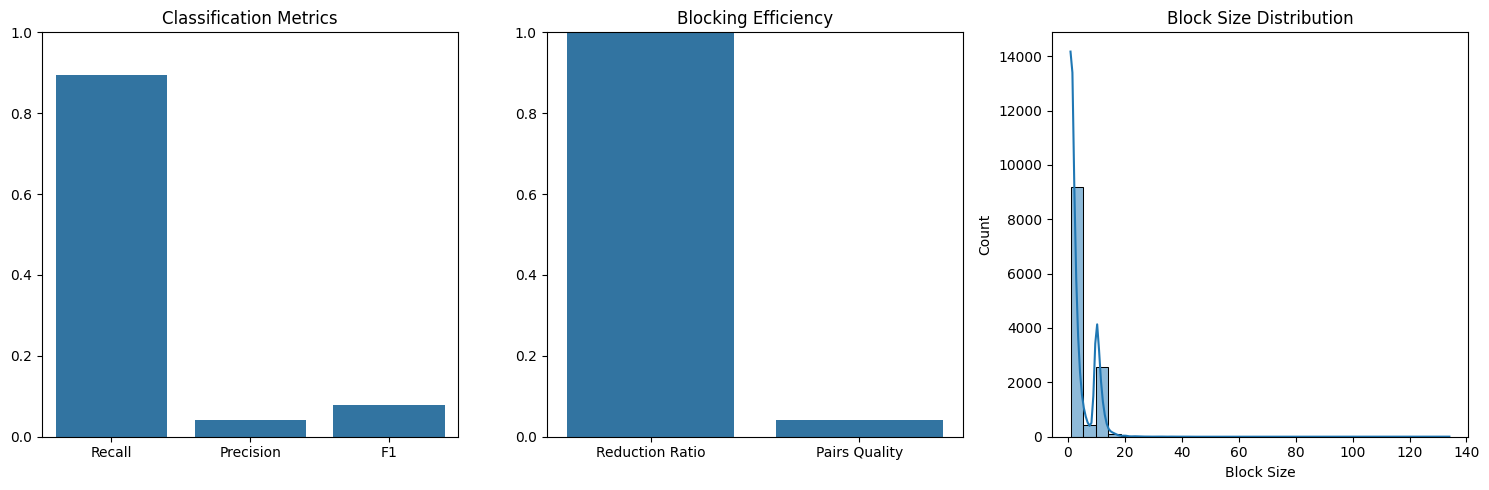

In [19]:
import pandas as pd
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_blocking(matches_df, ground_truth_path, blocking_stats=None):
    """
    Comprehensive evaluation of blocking performance
    
    Args:
        matches_df: DataFrame with candidate pairs from blocking
        ground_truth_path: path to ground truth matches file
        blocking_stats: dict with blocking statistics (optional)
    
    Returns:
        dict with all computed metrics
    """
    # Load ground truth
    ground_truth = pd.read_csv(ground_truth_path)
    
    # Convert to sets of tuples for fast lookup
    predicted_set = set(zip(matches_df['left_id'], matches_df['right_id']))
    ground_truth_set = set(zip(ground_truth['id1'], ground_truth['id2']))
    
    # Basic counts
    num_predicted = len(predicted_set)
    num_ground_truth = len(ground_truth_set)
    
    # Compute true positives, false positives, false negatives
    true_positives = predicted_set & ground_truth_set
    false_positives = predicted_set - ground_truth_set
    false_negatives = ground_truth_set - predicted_set
    
    # Standard classification metrics
    recall = len(true_positives) / num_ground_truth if num_ground_truth > 0 else 0
    precision = len(true_positives) / num_predicted if num_predicted > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Blocking-specific metrics
    metrics = {
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'true_positives': len(true_positives),
        'false_positives': len(false_positives),
        'false_negatives': len(false_negatives),
        'candidate_pairs': num_predicted,
        'ground_truth_pairs': num_ground_truth
    }
    
    # Calculate reduction ratio if we have total entity counts
    if blocking_stats:
        total_entities_left = blocking_stats.get('total_entities_left')
        total_entities_right = blocking_stats.get('total_entities_right')
        
        if total_entities_left and total_entities_right:
            total_possible_pairs = total_entities_left * total_entities_right
            reduction_ratio = 1 - (num_predicted / total_possible_pairs)
            metrics['reduction_ratio'] = reduction_ratio
            metrics['total_possible_pairs'] = total_possible_pairs
    
    # Calculate pairs quality
    metrics['pairs_quality'] = len(true_positives) / num_predicted if num_predicted > 0 else 0
    
    # Calculate pair completeness (same as recall for blocking)
    metrics['pair_completeness'] = recall
    
    return metrics

def plot_metrics(metrics, blocking_stats=None):
    """
    Visualize key metrics
    
    Args:
        metrics: dict from evaluate_blocking
        blocking_stats: dict from analyze_block_sizes
    """
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Classification metrics
    plt.subplot(1, 3, 1)
    sns.barplot(x=['Recall', 'Precision', 'F1'], 
                y=[metrics['recall'], metrics['precision'], metrics['f1_score']])
    plt.title('Classification Metrics')
    plt.ylim(0, 1)
    
    # Plot 2: Blocking efficiency
    plt.subplot(1, 3, 2)
    if 'reduction_ratio' in metrics:
        sns.barplot(x=['Reduction Ratio', 'Pairs Quality'], 
                    y=[metrics['reduction_ratio'], metrics['pairs_quality']])
        plt.title('Blocking Efficiency')
        plt.ylim(0, 1)
    
    # Plot 3: Block size distribution
    if blocking_stats:
        plt.subplot(1, 3, 3)
        sns.histplot(blocking_stats['block_sizes'], bins=30, kde=True)
        plt.title('Block Size Distribution')
        plt.xlabel('Block Size')
    
    plt.tight_layout()
    plt.show()

def analyze_block_sizes(matches_df):
    """
    Analyze distribution of block sizes
    
    Args:
        matches_df: DataFrame with candidate pairs
        
    Returns:
        dict with block size statistics and raw block sizes
    """
    # Create a dictionary to count references per entity (approximates block sizes)
    block_sizes = defaultdict(int)
    
    # Count how many times each entity appears in pairs
    for _, row in matches_df.iterrows():
        
        block_sizes[row['left_id']] += 1
        block_sizes[row['right_id']] += 1
    
    # Convert to series for easier calculations
    block_size_series = pd.Series(list(block_sizes.values()))

    return {
        'mean_block_size': block_size_series.mean(),
        'median_block_size': block_size_series.median(),
        'max_block_size': block_size_series.max(),
        'min_block_size': block_size_series.min(),
        'block_size_std': block_size_series.std(),
        'total_blocks': len(block_size_series),
        'block_sizes': block_size_series  # Now including the raw data for plotting
    }

# Update the example usage to properly handle block sizes
if __name__ == "__main__":
    # Load your matching results
    matches_df = pd.read_csv("entity_matches.csv")
    
    # Calculate metrics
    blocking_stats = {
        'total_entities_left': matches_df['left_id'].nunique(),
        'total_entities_right': matches_df['right_id'].nunique()
    }
    
    metrics = evaluate_blocking(matches_df, "walmart_amazon/matches.csv", blocking_stats)
    block_stats = analyze_block_sizes(matches_df)
    
    # Print results
    print("\n=== Classification Metrics ===")
    print(f"Recall (Pair Completeness): {metrics['recall']:.4f}")
    print(f"Precision (Pairs Quality): {metrics['precision']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    
    print("\n=== Blocking Efficiency ===")
    print(f"Candidate pairs: {metrics['candidate_pairs']}")
    if 'reduction_ratio' in metrics:
        print(f"Reduction Ratio: {metrics['reduction_ratio']:.4f}")
    print(f"Pairs Quality: {metrics['pairs_quality']:.4f}")
    
    print("\n=== Block Statistics ===")
    print(f"Mean block size: {block_stats['mean_block_size']:.2f}")
    print(f"Median block size: {block_stats['median_block_size']:.2f}")
    print(f"Max block size: {block_stats['max_block_size']}")
    print(f"Min block size: {block_stats['min_block_size']}")
    print(f"Total blocks: {block_stats['total_blocks']}")
    
    # Generate plots
    plot_metrics(metrics, block_stats)

In [13]:
matches_df['left_id']

0           1
1           1
2           1
3           1
4           1
         ... 
25535    2554
25536    2554
25537    2554
25538    2554
25539    2554
Name: left_id, Length: 25540, dtype: int64